In [2]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from pathlib import Path

In [3]:
RANDOM_SEED = 42
DATA_PATH = Path("../../data")

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


In [4]:
train_data = pd.read_csv(DATA_PATH / "train.csv")
test_data = pd.read_csv(DATA_PATH / "test.csv")

In [5]:
train_data

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.0,500.0,496,0.29325,3640.1,4473.0,9.1949,26.867,42.379,2700.2,...,53.429,29.249,60.773,21.532,40.451,34.064,48.953,48.291,40.812,18.756
249996,0.0,500.0,497,0.29134,3625.7,4506.2,9.2109,26.889,42.291,2700.6,...,53.830,28.975,61.517,21.750,42.762,42.645,51.055,48.589,40.933,19.360
249997,0.0,500.0,498,0.29438,3600.2,4478.3,9.1957,26.820,42.448,2700.3,...,54.163,28.676,61.656,21.487,42.109,39.770,46.770,48.648,41.465,19.344
249998,0.0,500.0,499,0.25269,3683.5,4486.4,9.2832,27.188,42.757,2697.4,...,53.453,24.889,61.564,21.392,39.334,42.274,43.623,48.797,39.835,18.512


In [6]:
simulrun_1 = train_data.query("simulationRun == 1")

In [6]:
simulrun_1["xmeas_1"]

0      0.25038
1      0.25109
2      0.25038
3      0.24977
4      0.29405
        ...   
495    0.24602
496    0.23457
497    0.23068
498    0.24263
499    0.23958
Name: xmeas_1, Length: 500, dtype: float64

<Axes: xlabel='sample', ylabel='xmeas_1'>

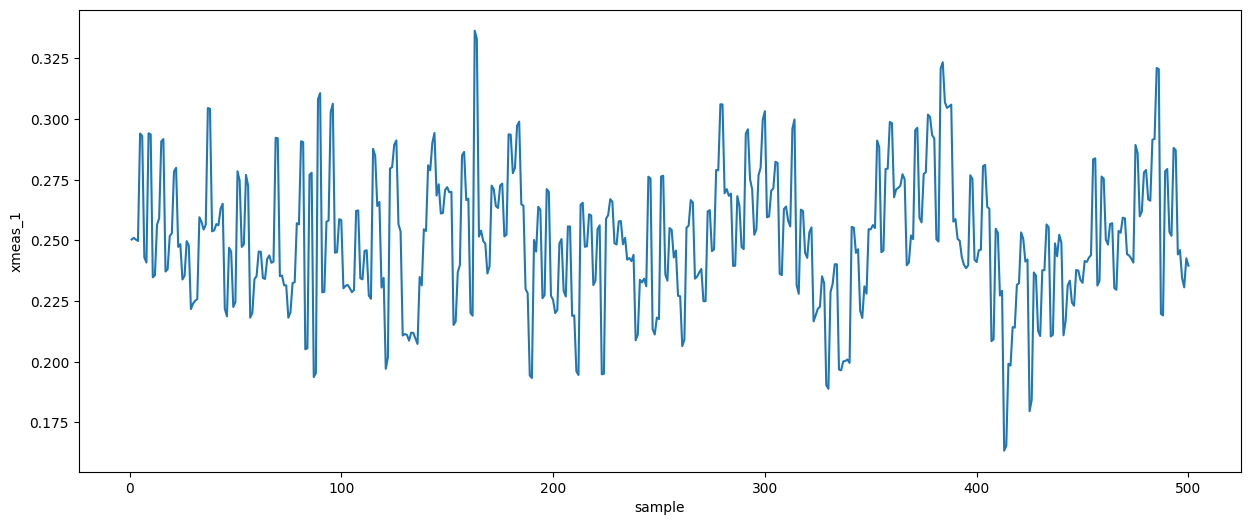

In [91]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=simulrun_1, x="sample", y="xmeas_1")

In [8]:
xmeas_1 = train_data["xmeas_1"].reset_index().iloc[:1000]

In [9]:
xmeas_1

,index,xmeas_1
0,0,0.25038
1,1,0.25109
2,2,0.25038
3,3,0.24977
4,4,0.29405
...,...,...
995,995,0.24345
996,996,0.19889
997,997,0.19876
998,998,0.22451


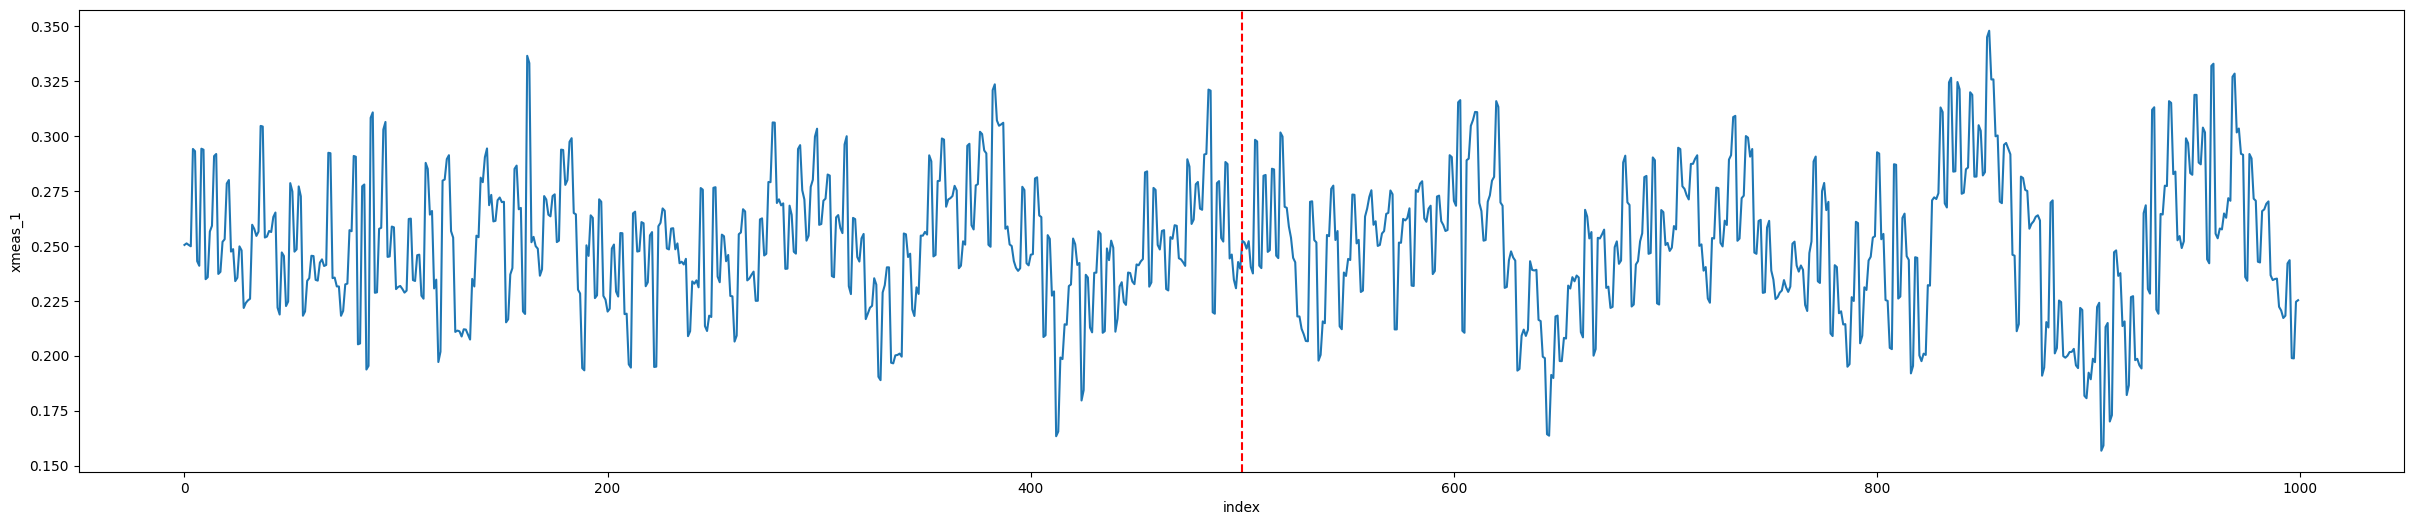

In [10]:
plt.figure(figsize=(30, 6))
sns.lineplot(data=xmeas_1, x="index", y="xmeas_1")
plt.axvline(x=500, color='r', linestyle='--')

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=128 is too large for input signal of length=52
  warnings.warn(


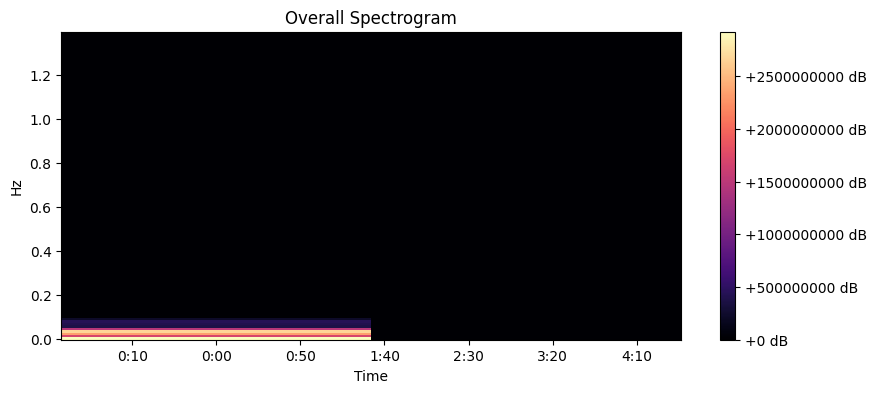

In [96]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 예시로 임의의 센서 데이터 생성 (52개의 센서, 각각 500개의 샘플로 이루어진 데이터)
num_sensors = 52
num_samples = 500
duration = 3 * 60  # 3분
sampling_rate = 2.778  # 500개의 데이터를 3분 동안 측정한 것으로 가정 (Hz)

# 임의의 센서 데이터 생성 (예시로 랜덤 데이터 생성)
sensor_data = simulrun_1.iloc[:, 3:].to_numpy()

# 각 센서 데이터의 스펙트로그램 생성
spectrograms = []
for data in sensor_data:
    # librosa를 사용하여 스펙트로그램 생성
    D = librosa.feature.melspectrogram(y=data, sr=2.778, hop_length=len(data), n_fft=128, n_mels=128, fmin=0, fmax=20, win_length=32)
    spectrograms.append(D)

# 전체적인 스펙트로그램 생성 (각 센서의 스펙트로그램을 합치거나 평균을 취함)
overall_spectrogram = np.mean(spectrograms, axis=0)

# 스펙트로그램 플로팅
plt.figure(figsize=(10, 4))
librosa.display.specshow(overall_spectrogram, sr=sampling_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Overall Spectrogram')
plt.show()

In [81]:
3*60*500

90000

In [87]:
spe_test = simulrun_1.loc[simulrun_1.index.repeat(180)].reset_index(drop=True)

In [88]:
spe_test

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
2,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
3,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
4,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.0,1.0,500,0.23958,3629.7,4566.3,9.5071,27.219,42.757,2703.8,...,53.996,23.686,59.553,22.749,40.036,37.977,52.375,50.728,41.145,19.029
89996,0.0,1.0,500,0.23958,3629.7,4566.3,9.5071,27.219,42.757,2703.8,...,53.996,23.686,59.553,22.749,40.036,37.977,52.375,50.728,41.145,19.029
89997,0.0,1.0,500,0.23958,3629.7,4566.3,9.5071,27.219,42.757,2703.8,...,53.996,23.686,59.553,22.749,40.036,37.977,52.375,50.728,41.145,19.029
89998,0.0,1.0,500,0.23958,3629.7,4566.3,9.5071,27.219,42.757,2703.8,...,53.996,23.686,59.553,22.749,40.036,37.977,52.375,50.728,41.145,19.029


<Axes: xlabel='None', ylabel='xmeas_1'>

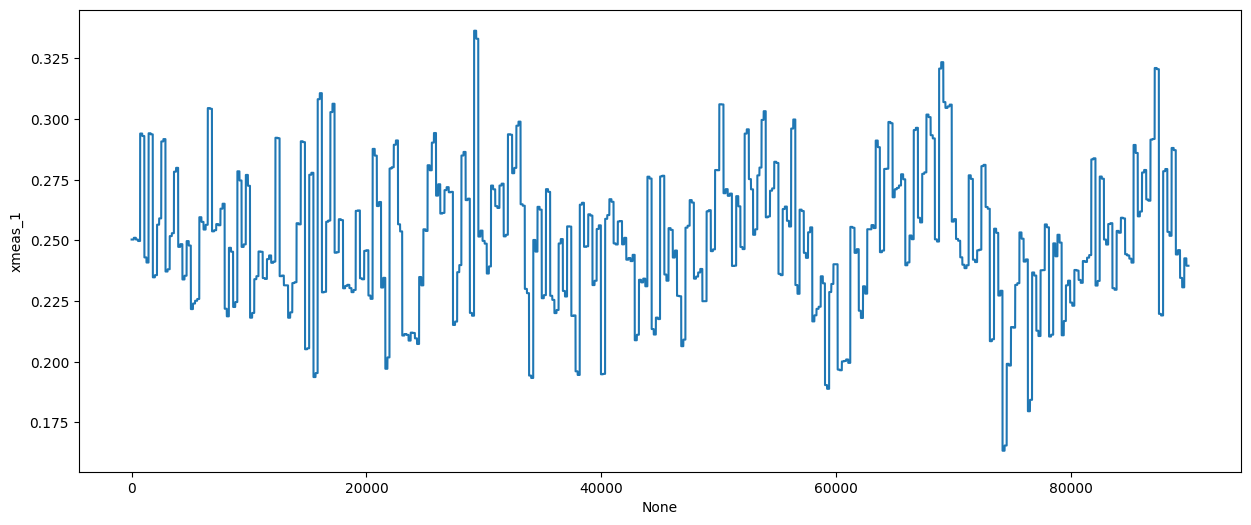

In [90]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=spe_test, x=spe_test.index, y="xmeas_1")

<Axes: xlabel='sample', ylabel='xmeas_1'>

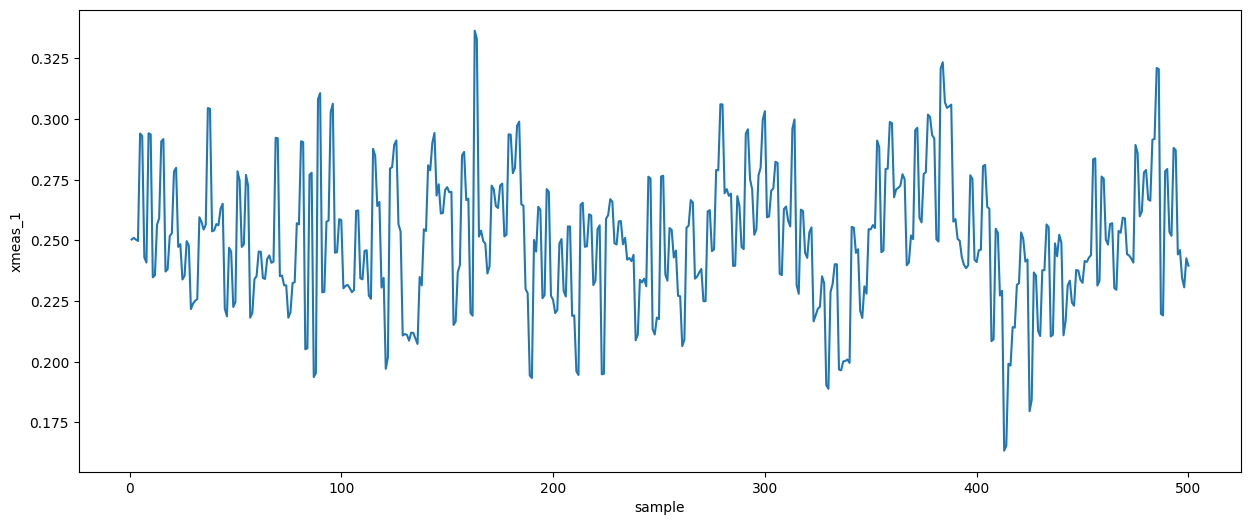

In [92]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=simulrun_1, x="sample", y="xmeas_1")

  0%|          | 0/52 [00:00<?, ?it/s]

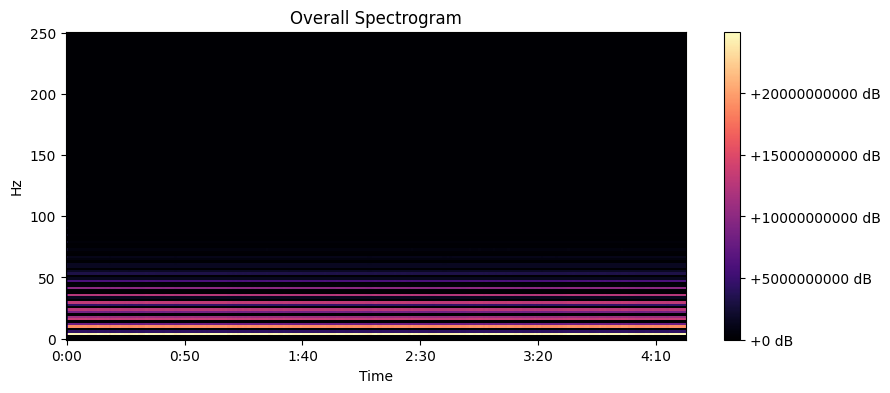

In [119]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 예시로 임의의 센서 데이터 생성 (52개의 센서, 각각 500개의 샘플로 이루어진 데이터)
num_sensors = 52
num_samples = 500
duration = 3 * 60  # 3분
sampling_rate = 500  # 500개의 데이터를 3분 동안 측정한 것으로 가정 (Hz)

# 임의의 센서 데이터 생성 (예시로 랜덤 데이터 생성)
sensor_data = spe_test.iloc[:, 3:].to_numpy().T

# 각 센서 데이터의 스펙트로그램 생성
spectrograms = []
for data in tqdm(sensor_data):
    # librosa를 사용하여 스펙트로그램 생성
    D = librosa.feature.melspectrogram(y=data, sr=500, hop_length=len(data)//256, n_fft=1024, n_mels=128, fmin=0, fmax=20, win_length=128)
    spectrograms.append(D)

# 전체적인 스펙트로그램 생성 (각 센서의 스펙트로그램을 합치거나 평균을 취함)
overall_spectrogram = np.mean(spectrograms, axis=0)

# 스펙트로그램 플로팅
plt.figure(figsize=(10, 4))
librosa.display.specshow(overall_spectrogram, sr=sampling_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Overall Spectrogram')
plt.show()

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 예시로 임의의 센서 데이터 생성 (52개의 센서, 각각 500개의 샘플로 이루어진 데이터)
num_sensors = 52
num_samples = 500
duration = 3 * 60  # 3분
sampling_rate = 500  # 500개의 데이터를 3분 동안 측정한 것으로 가정 (Hz)

# 임의의 센서 데이터 생성 (예시로 랜덤 데이터 생성)
sensor_data = spe_test.iloc[:, 3:].to_numpy().T

# 각 센서 데이터의 스펙트로그램 생성
spectrograms = []
for data in tqdm(sensor_data):
    # librosa를 사용하여 스펙트로그램 생성
    D = librosa.feature.melspectrogram(y=data, sr=500, hop_length=len(data)//256, n_fft=1024, n_mels=128, fmin=0, fmax=20, win_length=128)
    spectrograms.append(D)

# 전체적인 스펙트로그램 생성 (각 센서의 스펙트로그램을 합치거나 평균을 취함)
overall_spectrogram = np.mean(spectrograms, axis=0)

# 스펙트로그램 플로팅
plt.figure(figsize=(10, 4))
librosa.display.specshow(overall_spectrogram, sr=sampling_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Overall Spectrogram')
plt.show()

In [120]:
simulrun_2 = train_data.query("simulationRun==2")

In [122]:
spe_test2 = simulrun_2.loc[simulrun_2.index.repeat(180)].reset_index(drop=True)

  0%|          | 0/52 [00:00<?, ?it/s]

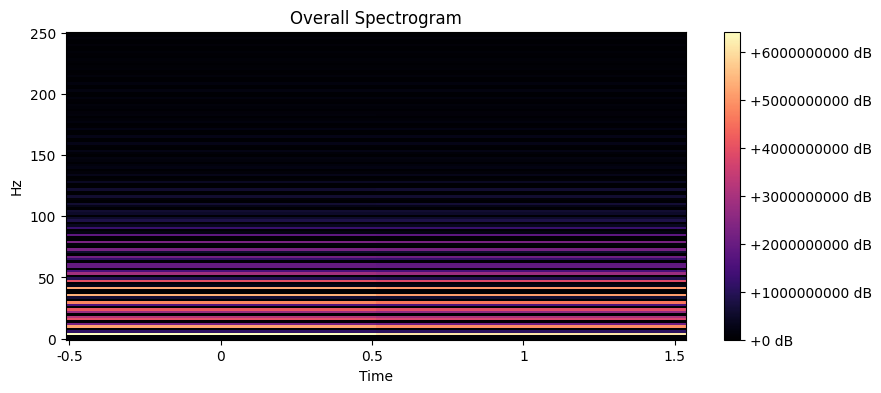

In [129]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 예시로 임의의 센서 데이터 생성 (52개의 센서, 각각 500개의 샘플로 이루어진 데이터)
num_sensors = 52
num_samples = 500
duration = 3 * 60  # 3분
sampling_rate = 500  # 500개의 데이터를 3분 동안 측정한 것으로 가정 (Hz)

# 임의의 센서 데이터 생성 (예시로 랜덤 데이터 생성)
sensor_data = spe_test2.iloc[:, 3:].to_numpy().T

# 각 센서 데이터의 스펙트로그램 생성
spectrograms = []
for data in tqdm(sensor_data):
    # librosa를 사용하여 스펙트로그램 생성
    D = librosa.feature.melspectrogram(y=data, sr=500, hop_length=len(data), n_fft=1024, n_mels=128, fmin=0, fmax=20, win_length=128)
    spectrograms.append(D)

# 전체적인 스펙트로그램 생성 (각 센서의 스펙트로그램을 합치거나 평균을 취함)
overall_spectrogram = np.mean(spectrograms, axis=0)

# 스펙트로그램 플로팅
plt.figure(figsize=(10, 4))
librosa.display.specshow(overall_spectrogram, sr=sampling_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Overall Spectrogram')
plt.show()

  0%|          | 0/52 [00:00<?, ?it/s]

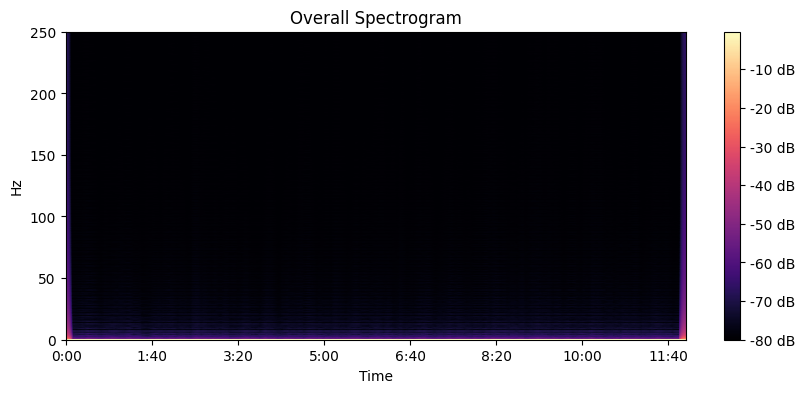

In [132]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 예시로 임의의 센서 데이터 생성 (52개의 센서, 각각 500개의 샘플로 이루어진 데이터)
num_sensors = 52
num_samples = 500
duration = 3 * 60  # 3분
sampling_rate = 500  # 500개의 샘플을 3분 동안 수집한 것으로 가정

# 임의의 센서 데이터 생성 (예시로 랜덤 데이터 생성)
sensor_data = spe_test2.iloc[:, 3:].to_numpy().T

# 각 센서 데이터의 스펙트로그램 생성
spectrograms = []
for data in tqdm(sensor_data):
    # librosa를 사용하여 스펙트로그램 생성
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data, hop_length=128)), ref=np.max)
    spectrograms.append(D)

# 전체적인 스펙트로그램 생성 (각 센서의 스펙트로그램을 합치거나 평균을 취함)
overall_spectrogram = np.mean(spectrograms, axis=0)

# 스펙트로그램 플로팅
plt.figure(figsize=(10, 4))
librosa.display.specshow(overall_spectrogram, sr=sampling_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Overall Spectrogram')
plt.show()


In [7]:
simulrun_1

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,1.0,496,0.24602,3651.9,4504.4,9.4721,26.600,42.312,2707.2,...,54.132,23.663,59.588,22.481,38.952,33.489,45.203,49.900,41.057,16.448
496,0.0,1.0,497,0.23457,3663.0,4529.5,9.3440,26.872,42.434,2704.1,...,54.028,22.776,60.566,22.237,42.978,38.017,42.637,50.075,41.339,17.435
497,0.0,1.0,498,0.23068,3656.4,4493.0,9.2978,26.920,42.536,2700.3,...,54.465,23.158,62.102,21.639,42.483,41.016,46.782,50.098,41.277,18.315
498,0.0,1.0,499,0.24263,3632.5,4521.5,9.3915,26.956,42.317,2701.9,...,54.532,23.386,63.164,22.661,39.558,37.892,47.468,50.312,40.557,19.198


In [8]:
simulrun_1_xmeas_1 = simulrun_1["xmeas_1"]

In [9]:
simulrun_1_xmeas_1

0      0.25038
1      0.25109
2      0.25038
3      0.24977
4      0.29405
        ...   
495    0.24602
496    0.23457
497    0.23068
498    0.24263
499    0.23958
Name: xmeas_1, Length: 500, dtype: float64